# 1. Combine the two lists

In [170]:
l0 = [0, 1, 2, 3, 4, 5]
l1 = ['a', 'b', 'c', 'd', 'e', 'f']

##### Solution:

Use zip() with list()

In [171]:
list(zip(l0, l1))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f')]

# 2. Create all products of the two lists

In [172]:
l0 = [0, 1, 2]
l1 = ['a', 'b', 'c']

##### Solution:

Using list comprehension

In [173]:
[(i0, i1) for i0 in l0 for i1 in l1]

[(0, 'a'),
 (0, 'b'),
 (0, 'c'),
 (1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c')]

Using product() from itertools with list()

In [174]:
from itertools import product

list(product(l0, l1))

[(0, 'a'),
 (0, 'b'),
 (0, 'c'),
 (1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c')]

#  3. Sort the list

Do not do it manually ;)

In [175]:
l = [12.34, 'z', 3, 'a', 8, 'd', 16.6]

#####  Solution:

Split the list into strings and numbers first. Than use sorted on both list and combien them.

In [176]:
l_str = [i for i in l if isinstance(i, str)]
l_nr = [i for i in l if isinstance(i, (float, int))]
                                   
sorted(l_nr) + sorted(l_str)

[3, 8, 12.34, 16.6, 'a', 'd', 'z']

# 4. Filter the list 

Filter out all the negativ numbers.

In [177]:
import random

random_data = [random.random() - 0.5 for _ in range(10000)]

#####  Solution:

In [178]:
neg_data = [i for i in random_data if i < 0]

neg_data[:10]

[-0.4165685020738821,
 -0.09260743159935081,
 -0.03504080593663883,
 -0.2768584480917988,
 -0.39163074678826015,
 -0.18299228715681282,
 -0.25972723662348896,
 -0.2978799639514299,
 -0.2716618824167748,
 -0.10348632486883058]

# 5. Create a parabola function

Define your own parabola function $f(x) = a (x - b)^2 - c$.

##### Solution:

In [179]:
def parabola(x, a = 1, b=0, c=0):
    return a * (x - b)**2 - c

parabola(0, a = 0.5, b=-2, c=3)

-1.0

# 6. Plot two parabola in subplots

Feel free to make it look nice.

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline


##### Solution:

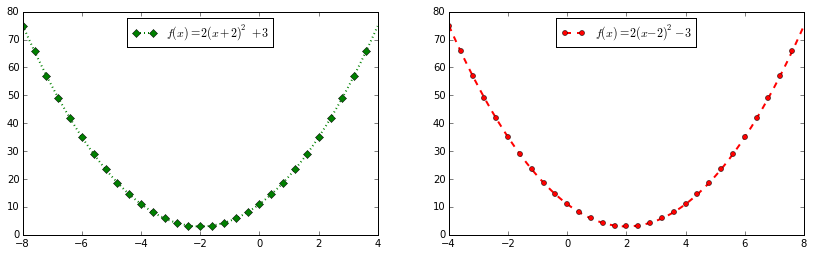

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

x_data0 = [8 * x /1000 for x in range(-1000, 500)]
p0 = [parabola(x, a=2, b=-2, c=-3) for x in x_data0]
axs[0].plot(x_data0, p0, color='green', ls=':', lw=2,  marker='D', markevery=50, ms=5, label=r'$f(x) = 2 (x + 2)^2 + 3$')

x_data1 = [8 * x /1000 for x in range(-500, 1000)]
p1 = [parabola(x, a=2, b=2, c=-3) for x in x_data1]
axs[1].plot(x_data1, p1, color='red', ls='--', lw=2,  marker='o', markevery=50, ms=5, label=r'$f(x) = 2 (x - 2)^2 - 3$')

for ax in axs:
    ax.legend(loc=9)

# 7. Differntiate a sin function numerical

Use the given dataset

In [182]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

xdata = [2 *  math.pi  * x / 1000 for x in range(1000)]
ydata = [math.sin(x) for x in xdata]

##### Solution:

Use slicing and zip() to differentiate

In [183]:
dy_data = [(y1 - y0) / (x1 - x0) for y1, y0, x1, x0 in zip(ydata[1:], ydata[:-1], 
                                                           xdata[1:], xdata[:-1])]

Plot everything

(0, 6.28)

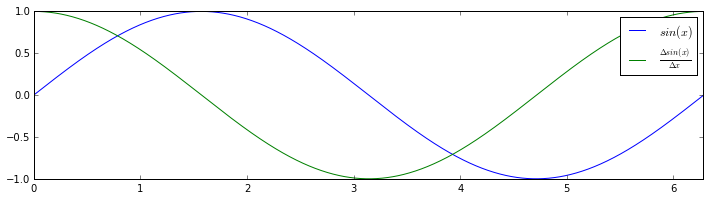

In [184]:
plt.figure(figsize=(12, 3))
plt.plot(xdata, ydata, label=r'$sin(x)$')
plt.plot(xdata[1:], dy_data, label=r'$\frac{\Delta sin(x)}{\Delta x} $')
plt.legend()
plt.xlim(0, 6.28)

# 8. Smooth some noisy data

Use the given dataset

In [185]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

xdata = [4 *  math.pi  * x / 1000 for x in range(1000)]
noisy_data = [math.sin(x) + 0.25 * random.random() for x in xdata]

##### Solution:

In [186]:
s = 50
smoothed_data = [sum(noisy_data[i:i+s]) / s  for i in range(len(noisy_data) - s)]

(0, 6.28)

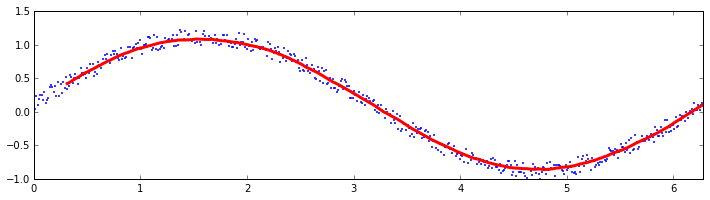

In [187]:
plt.figure(figsize=(12,3))
plt.plot(xdata, noisy_data, ls='', marker='.', ms=3)
plt.plot(xdata[s//2:-s//2], smoothed_data, color='red', lw=3)

plt.xlim(0, 6.28)

# 9. Create a Histogram

Create a histogram from the poisson data array. Do not use any build in numpy or histogram plot function.

In [188]:
from numpy.random import poisson

data = poisson(lam = 50, size=int(10e6))

# Don't worry too much about the next line it just prints nicely
print(str(data[:5])[1:-1], '...', str(data[-5:])[1:-1])

45 46 41 59 59 ... 52 43 57 37 45


##### Solution:

Using python build in dict and check for key with if in

In [189]:
histo = {}

for value in data:
    if value in histo:
        histo[value] += 1
    else:
        histo[value] = 1

Using python build in dict and exceptions

In [190]:
histo = {}

for value in data:
    try:
        histo[value] += 1
    except KeyError:
        histo[value] = 1

Using the defaultdict() from collections with int()

In [191]:
from collections import defaultdict

histo = defaultdict(int)

for value in data:
    histo[value] += 1

Using counter from collections

In [192]:
from collections import Counter

histo = Counter(data)

In [193]:
histo

Counter({18: 1,
         19: 1,
         20: 1,
         21: 22,
         22: 39,
         23: 77,
         24: 169,
         25: 380,
         26: 707,
         27: 1302,
         28: 2307,
         29: 4056,
         30: 6826,
         31: 11043,
         32: 17168,
         33: 25976,
         34: 37881,
         35: 54191,
         36: 74980,
         37: 102276,
         38: 134738,
         39: 172624,
         40: 214789,
         41: 261717,
         42: 313190,
         43: 363709,
         44: 412979,
         45: 457188,
         46: 496264,
         47: 530984,
         48: 553238,
         49: 563630,
         50: 563414,
         51: 552311,
         52: 531440,
         53: 500941,
         54: 463259,
         55: 421020,
         56: 377327,
         57: 329483,
         58: 284815,
         59: 240677,
         60: 201030,
         61: 164407,
         62: 132798,
         63: 105167,
         64: 82491,
         65: 63351,
         66: 47745,
         67: 35867,
    

# 10. Write your own histogram plotting function

Wrap it around the plt.plot function so you can use all of its arguments

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Solution:

In [200]:
from collections import Counter

def plot_histogram(data, normed=False, *args, **kwargs):
    
    histo = Counter(data)
    
    bins = list(histo.keys())
    freqs = list(histo.values())
    
    if normed:
        n = sum(freqs)
        freqs = [freq / n for freq in freqs]
    
    plt.plot(bins, freqs, *args, **kwargs)

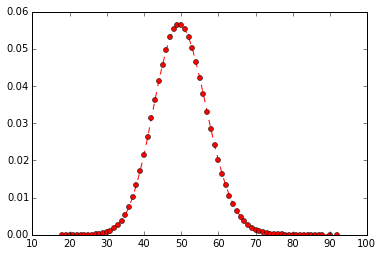

In [202]:
plot_histogram(data, normed=True, ls='--', marker='o', ms=5, color='red')

# 11. Draw a ASCII chrismas tree and write it to a file

Merry christmas. Feel free to add some UNICODE decoration.

##### Solution: 

In [205]:
...

print(tree(12), star=True)


           ★
          ★★★
           ★
           #
          ###
         #####
        #######
       #########
      ###########
     #############
    ###############
   #################
  ###################
 #####################
#######################
           H
           H
           H

